# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [513]:
# your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import OutlierTrimmer

df = pd.read_csv("Online Retail.csv")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [515]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [516]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [517]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [518]:
# Too many missing values in CustomerID

df.drop(columns="CustomerID", axis=1, inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom


In [519]:
df[['InvoiceDate', 'InvoiceTime']] = df['InvoiceDate'].str.split(' ', expand=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010,2.55,United Kingdom,8:26
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010,3.39,United Kingdom,8:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010,2.75,United Kingdom,8:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010,3.39,United Kingdom,8:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010,3.39,United Kingdom,8:26


In [520]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y")
df['Year'] = df['InvoiceDate'].dt.year
df['Month_Num'] = df['InvoiceDate'].dt.month
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Day'] = df['InvoiceDate'].dt.day

df['InvoiceTime'] = pd.to_datetime(df['InvoiceTime'], format="%H:%M")
df['Hour'] = df['InvoiceTime'].dt.hour
df['Minute'] = df['InvoiceTime'].dt.minute

df.drop(["InvoiceDate", "InvoiceTime"], inplace=True, axis=1)

df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Year,Month_Num,Month,Day,Hour,Minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,2010,12,December,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,2010,12,December,1,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,2010,12,December,1,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,2010,12,December,1,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,2010,12,December,1,8,26


In [521]:
# InvoiceNo and StockCode not required for analysis

df.drop(labels=["InvoiceNo", "StockCode"], axis=1, inplace=True)
df.head()

,Description,Quantity,UnitPrice,Country,Year,Month_Num,Month,Day,Hour,Minute
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,2010,12,December,1,8,26
1,WHITE METAL LANTERN,6,3.39,United Kingdom,2010,12,December,1,8,26
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,2010,12,December,1,8,26
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,2010,12,December,1,8,26
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,2010,12,December,1,8,26


In [522]:
# Invalid values in quantity

df[df["Quantity"] < 0]

,Description,Quantity,UnitPrice,Country,Year,Month_Num,Month,Day,Hour,Minute
141,Discount,-1,27.50,United Kingdom,2010,12,December,1,9,41
154,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,United Kingdom,2010,12,December,1,9,49
235,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,United Kingdom,2010,12,December,1,10,24
236,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,United Kingdom,2010,12,December,1,10,24
237,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,United Kingdom,2010,12,December,1,10,24
...,...,...,...,...,...,...,...,...,...,...
540449,ZINC T-LIGHT HOLDER STARS SMALL,-11,0.83,United Kingdom,2011,12,December,9,9,57
541541,Manual,-1,224.69,United Kingdom,2011,12,December,9,10,28
541715,VICTORIAN SEWING BOX LARGE,-5,10.95,United Kingdom,2011,12,December,9,11,57
541716,HANGING HEART JAR T-LIGHT HOLDER,-1,1.25,United Kingdom,2011,12,December,9,11,58


In [523]:
df[df["UnitPrice"] < 0]

,Description,Quantity,UnitPrice,Country,Year,Month_Num,Month,Day,Hour,Minute
299983,Adjust bad debt,1,-11062.06,United Kingdom,2011,8,August,12,14,51
299984,Adjust bad debt,1,-11062.06,United Kingdom,2011,8,August,12,14,52


In [524]:
df["UnitPrice"] = df["UnitPrice"].abs()

In [525]:
df["Quantity"] = df["Quantity"].abs()

In [526]:
df["NetPrice"] = df["UnitPrice"]*df["Quantity"]
df = df[["Description",	"Quantity",	"UnitPrice", "NetPrice", "Country",	"Year",	"Month", "Month_Num", "Day", "Hour",	"Minute"]]
df.head()

,Description,Quantity,UnitPrice,NetPrice,Country,Year,Month,Month_Num,Day,Hour,Minute
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,United Kingdom,2010,December,12,1,8,26
1,WHITE METAL LANTERN,6,3.39,20.34,United Kingdom,2010,December,12,1,8,26
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,United Kingdom,2010,December,12,1,8,26
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,United Kingdom,2010,December,12,1,8,26
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,United Kingdom,2010,December,12,1,8,26


<Axes: ylabel='NetPrice'>

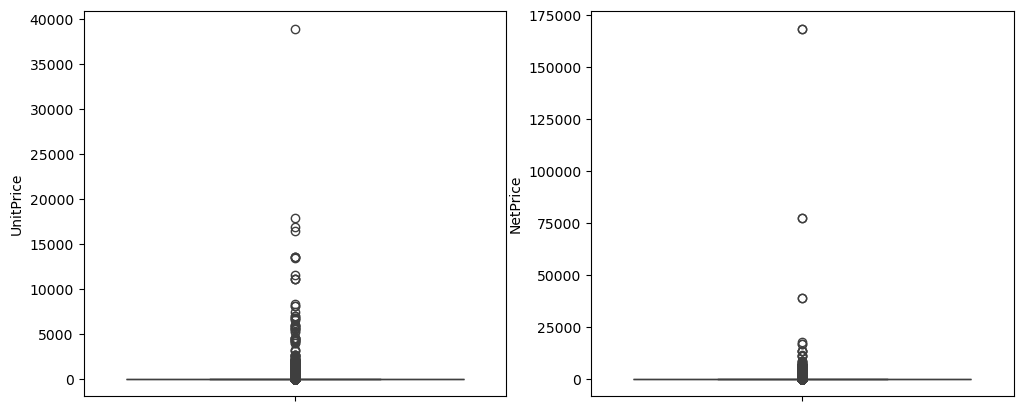

In [527]:
# Checking for outliers

fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(df["UnitPrice"], ax=ax[0])
sns.boxplot(df["NetPrice"], ax=ax[1])

In [528]:
df.describe()

,Quantity,UnitPrice,NetPrice,Year,Month_Num,Day,Hour,Minute
count,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,11.340487,4.692766,21.379274,2010.921609,7.553128,15.023096,13.078729,30.010965
std,217.995482,96.755927,378.634556,0.268787,3.509055,8.664063,2.443270,16.968523
min,1.000000,0.000000,0.000000,2010.000000,1.000000,1.000000,6.000000,0.000000
25%,1.000000,1.250000,3.750000,2011.000000,5.000000,7.000000,11.000000,16.000000
50%,3.000000,2.080000,9.900000,2011.000000,8.000000,15.000000,13.000000,30.000000
75%,10.000000,4.130000,17.700000,2011.000000,11.000000,22.000000,15.000000,44.000000
max,80995.000000,38970.000000,168469.600000,2011.000000,12.000000,31.000000,20.000000,59.000000


In [529]:
trimmer = OutlierTrimmer(capping_method='iqr', fold=1.5, variables=["UnitPrice"])
df_t = trimmer.fit_transform(df)
len(df_t)

502282

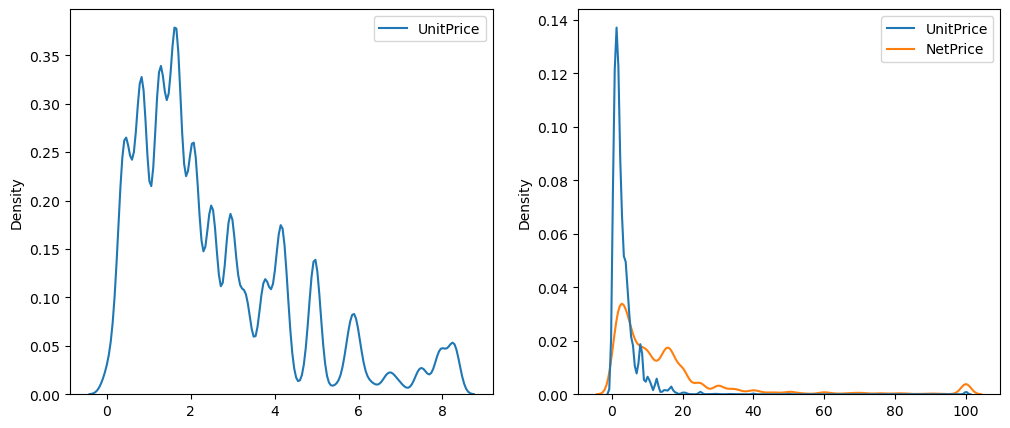

In [530]:
# Using clipped values since there's 40k+ Outliers

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.kdeplot(df_t[["UnitPrice"]],  ax=axes[0])
sns.kdeplot(np.clip(0, 100 , df[["UnitPrice", "NetPrice"]]), ax=axes[1])
plt.show()

In [531]:
df.groupby(by="Description")["Quantity"].sum().sort_values(ascending=False)

Description
PAPER CRAFT , LITTLE BIRDIE           161990
MEDIUM CERAMIC TOP STORAGE JAR        152527
WORLD WAR 2 GLIDERS ASSTD DESIGNS      56247
JUMBO BAG RED RETROSPOT                49593
WHITE HANGING HEART T-LIGHT HOLDER     40473
                                       ...  
PINK BERTIE MOBILE PHONE CHARM             1
PINK CRYSTAL GUITAR PHONE CHARM            1
PINK FEATHER CHRISTMAS DECORATION          1
PINK LARGE JEWELED PHOTOFRAME              1
FLOWER SHOP DESIGN MUG                     1
Name: Quantity, Length: 4223, dtype: int64

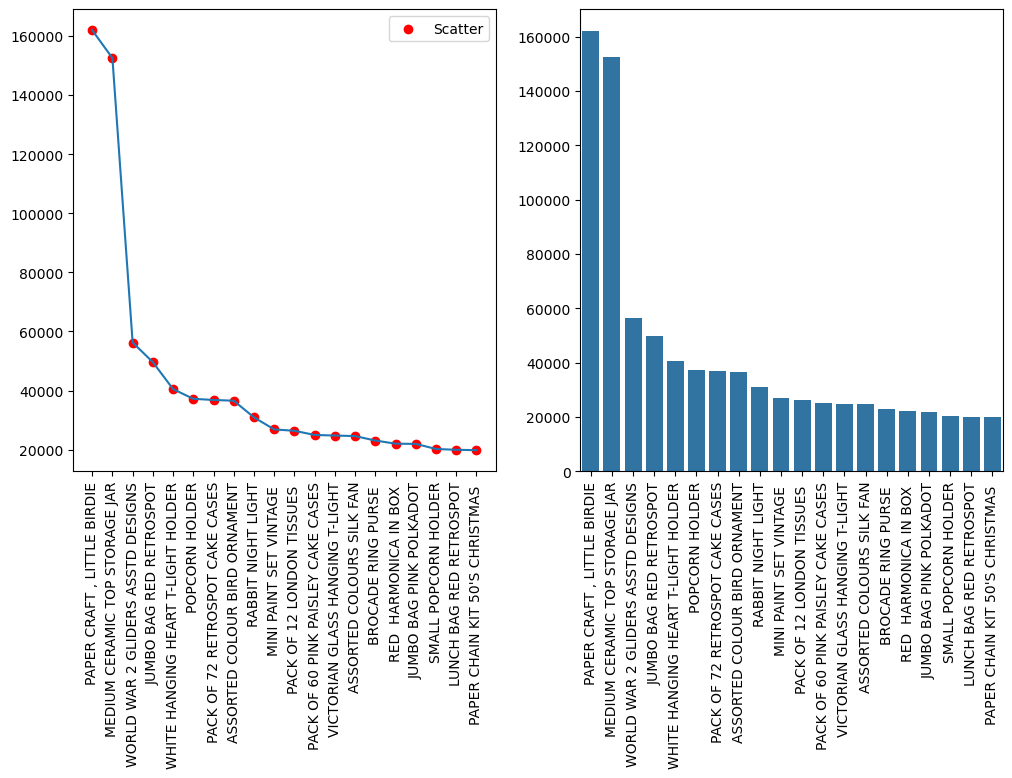

In [545]:
fig, axes = plt.subplots(1,2,figsize=(12,6))

axes[0].scatter(np.arange(20), df.groupby(by="Description")["Quantity"].sum().sort_values(ascending=False).values[:20], 
                color='red', label="Scatter")

sns.lineplot(x=np.arange(20), 
            y=df.groupby(by="Description")["Quantity"].sum().sort_values(ascending=False).values[:20], ax=axes[0])

sns.barplot(x=np.arange(20), 
            y=df.groupby(by="Description")["Quantity"].sum().sort_values(ascending=False).values[:20], ax=axes[1])

axes[0].set_xticks(np.arange(20))
axes[0].set_xticklabels(df.groupby(by="Description")["Quantity"].sum().sort_values(ascending=False).index[:20], rotation=90)
axes[1].set_xticks(np.arange(20))
axes[1].set_xticklabels(df.groupby(by="Description")["Quantity"].sum().sort_values(ascending=False).index[:20], rotation=90)
plt.show()

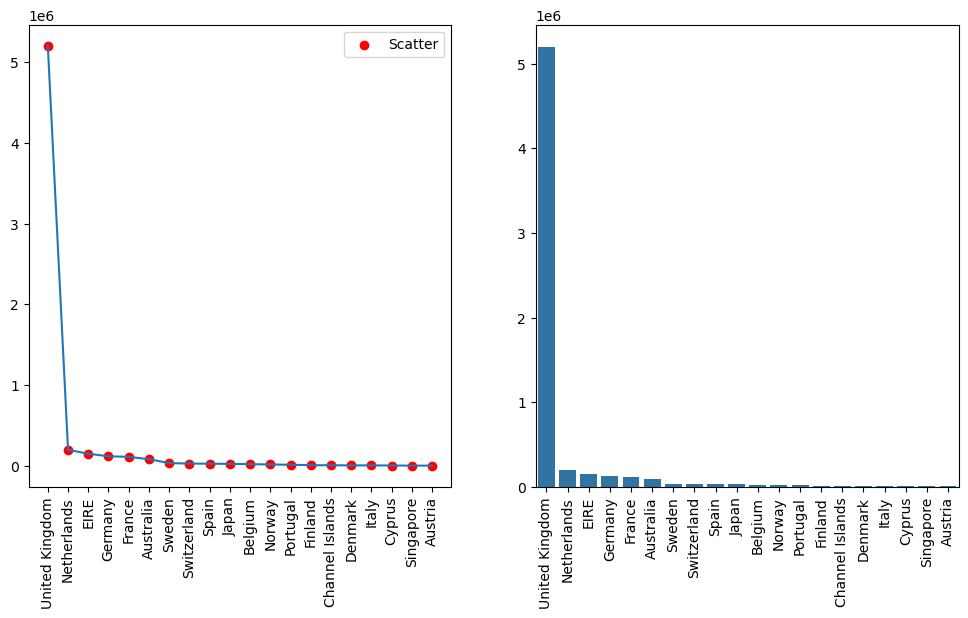

In [533]:
fig, axes = plt.subplots(1,2,figsize=(12,6))

axes[0].scatter(np.arange(20), df.groupby(by="Country")["Quantity"].sum().sort_values(ascending=False).values[:20], 
                color='red', label="Scatter")

sns.lineplot(x=np.arange(20), 
            y=df.groupby(by="Country")["Quantity"].sum().sort_values(ascending=False).values[:20], ax=axes[0])

sns.barplot(x=np.arange(20), 
            y=df.groupby(by="Country")["Quantity"].sum().sort_values(ascending=False).values[:20], ax=axes[1])

axes[0].set_xticks(np.arange(20))
axes[0].set_xticklabels(df.groupby(by="Country")["Quantity"].sum().sort_values(ascending=False).index[:20], rotation=90)
axes[1].set_xticks(np.arange(20))
axes[1].set_xticklabels(df.groupby(by="Country")["Quantity"].sum().sort_values(ascending=False).index[:20], rotation=90)
plt.show()

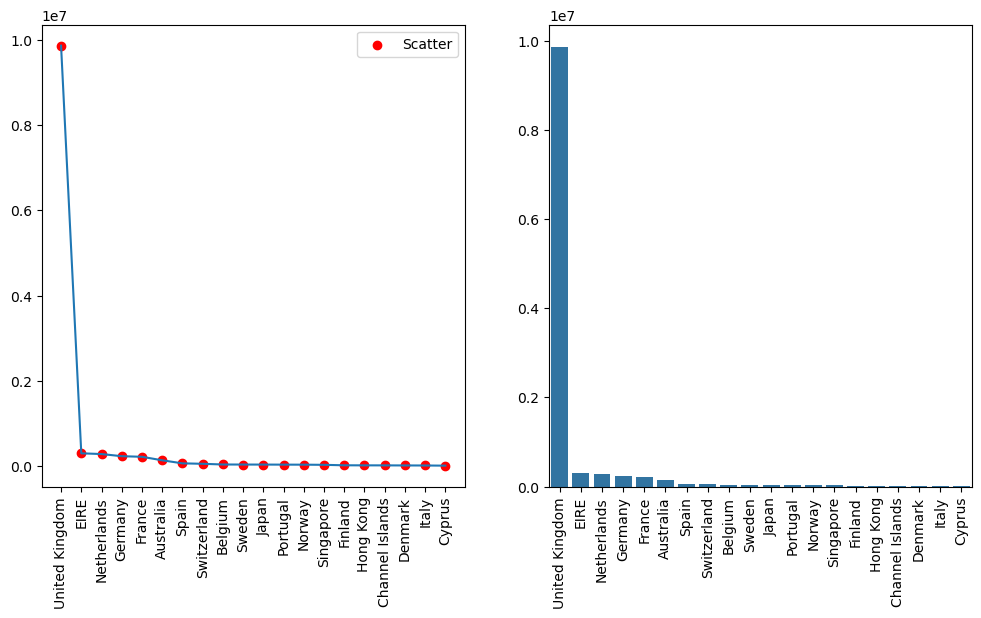

In [534]:
fig, axes = plt.subplots(1,2,figsize=(12,6))

axes[0].scatter(np.arange(20), df.groupby(by="Country")["NetPrice"].sum().sort_values(ascending=False).values[:20], 
                color='red', label="Scatter")

sns.lineplot(x=np.arange(20), 
            y=df.groupby(by="Country")["NetPrice"].sum().sort_values(ascending=False).values[:20], ax=axes[0])

sns.barplot(x=np.arange(20), 
            y=df.groupby(by="Country")["NetPrice"].sum().sort_values(ascending=False).values[:20], ax=axes[1])

axes[0].set_xticks(np.arange(20))
axes[0].set_xticklabels(df.groupby(by="Country")["NetPrice"].sum().sort_values(ascending=False).index[:20], rotation=90)
axes[1].set_xticks(np.arange(20))
axes[1].set_xticklabels(df.groupby(by="Country")["NetPrice"].sum().sort_values(ascending=False).index[:20], rotation=90)
plt.show()

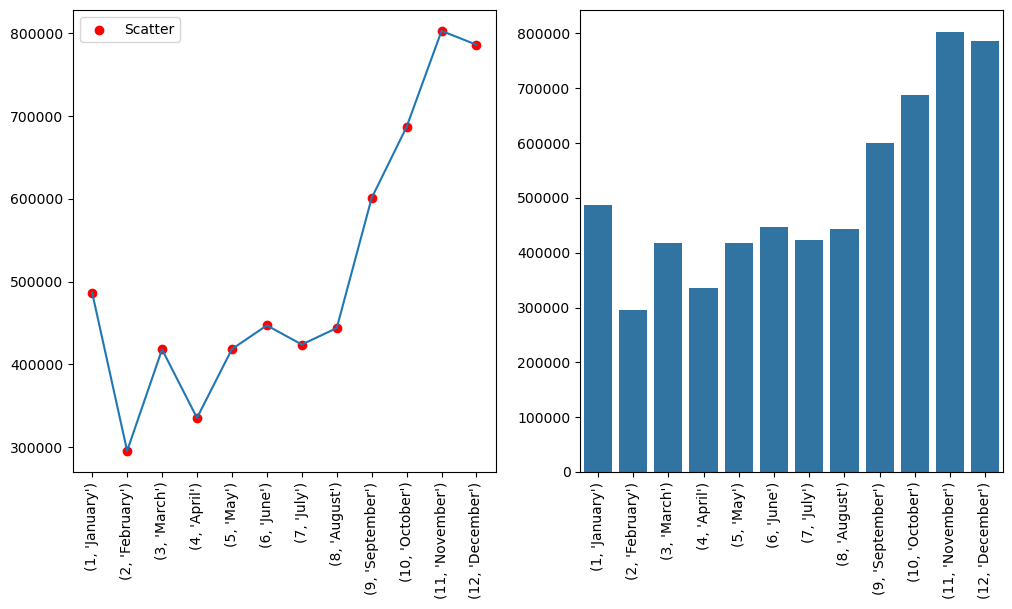

In [535]:
fig, axes = plt.subplots(1,2,figsize=(12,6))

axes[0].scatter(np.arange(12), df.groupby(by=["Month_Num","Month"])["Quantity"].sum().values, 
                color='red', label="Scatter")

sns.lineplot(x=np.arange(12), 
            y=df.groupby(by=["Month_Num","Month"])["Quantity"].sum().values, ax=axes[0])

sns.barplot(x=np.arange(12), 
            y=df.groupby(by=["Month_Num","Month"])["Quantity"].sum().values, ax=axes[1])

axes[0].set_xticks(np.arange(12))
axes[0].set_xticklabels(df.groupby(by=["Month_Num","Month"])["Quantity"].sum().index, rotation=90)
axes[1].set_xticks(np.arange(12))
axes[1].set_xticklabels(df.groupby(by=["Month_Num","Month"])["Quantity"].sum().index, rotation=90)
plt.show()

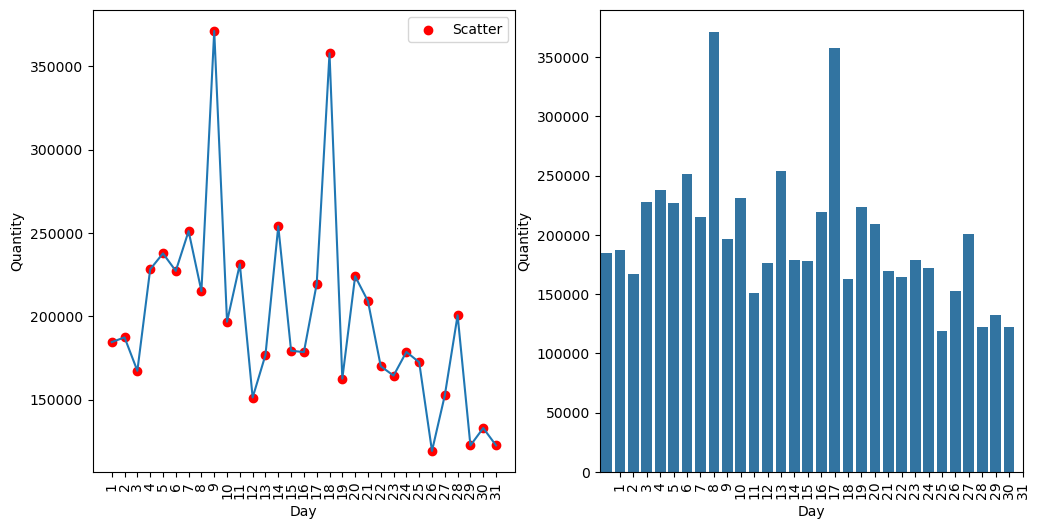

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(12,6))

axes[0].scatter(np.arange(12), df.groupby(by=["Month_Num","Month"])["Quantity"].sum().values, 
                color='red', label="Scatter")

sns.lineplot(x=np.arange(12), 
            y=df.groupby(by=["Month_Num","Month"])["Quantity"].sum().values, ax=axes[0])

sns.barplot(x=np.arange(12), 
            y=df.groupby(by=["Month_Num","Month"])["Quantity"].sum().values, ax=axes[1])

axes[0].set_xticks(np.arange(12))
axes[0].set_xticklabels(df.groupby(by=["Month_Num","Month"])["Quantity"].sum().index, rotation=90)
axes[1].set_xticks(np.arange(12))
axes[1].set_xticklabels(df.groupby(by=["Month_Num","Month"])["Quantity"].sum().index, rotation=90)
plt.show()

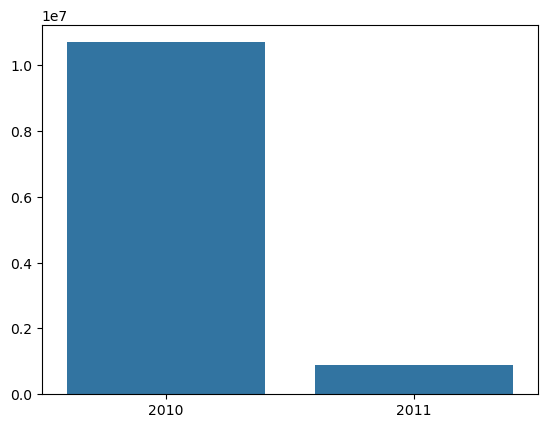

In [544]:
sns.barplot(x=np.arange(len(df["Year"].unique())), 
            y=df.groupby(by="Year")["NetPrice"].sum().sort_values(ascending=False).values[:len(df["Year"].unique())])
plt.xticks(np.arange(len(df["Year"].unique())), df["Year"].unique())
plt.show()

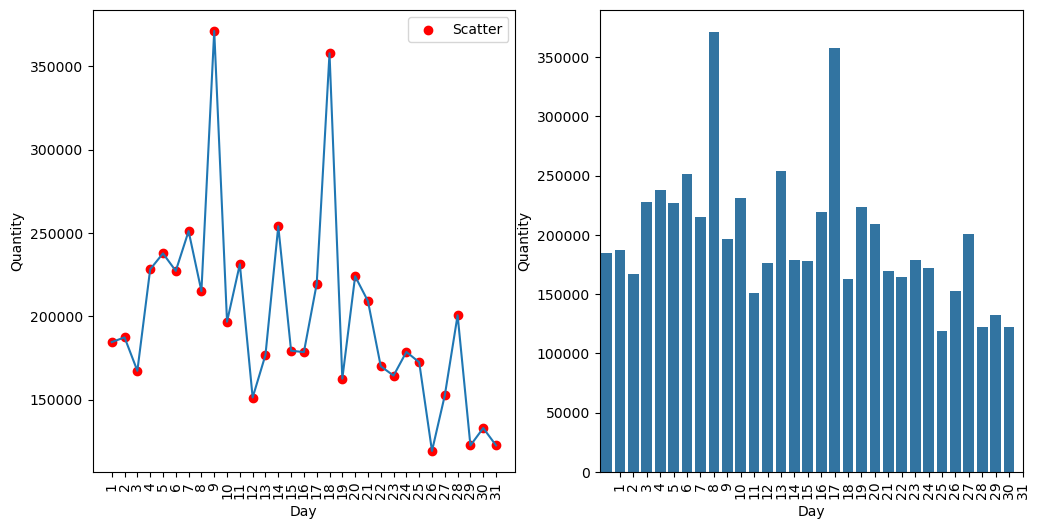

In [550]:
df['Day'] = df['Day'].astype(int)

daily_sales = df.groupby('Day', sort=True)['Quantity'].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(daily_sales["Day"], daily_sales["Quantity"], color='red', label="Scatter")
sns.lineplot(x=daily_sales["Day"], y=daily_sales["Quantity"], ax=axes[0])

sns.barplot(x=daily_sales["Day"], y=daily_sales["Quantity"], ax=axes[1])

axes[0].set_xticks(daily_sales["Day"])
axes[0].set_xticklabels(daily_sales["Day"], rotation=90)
axes[1].set_xticks(daily_sales["Day"])
axes[1].set_xticklabels(daily_sales["Day"], rotation=90)

plt.show()

United Kingdom is the country with the highest number of Orders

More number of orders are placed at the end of the year , i.e., on September, October, November and December

More orders are placed on the middle of the week

Paper Craft, Little Birdie and Medium Ceramic Top, Storage Jar remain the most dominant products by a large margin